Default AdaBoost accuracy (n_estimators=10): 0.8182
Best accuracy: 0.8340 with n_estimators = 73


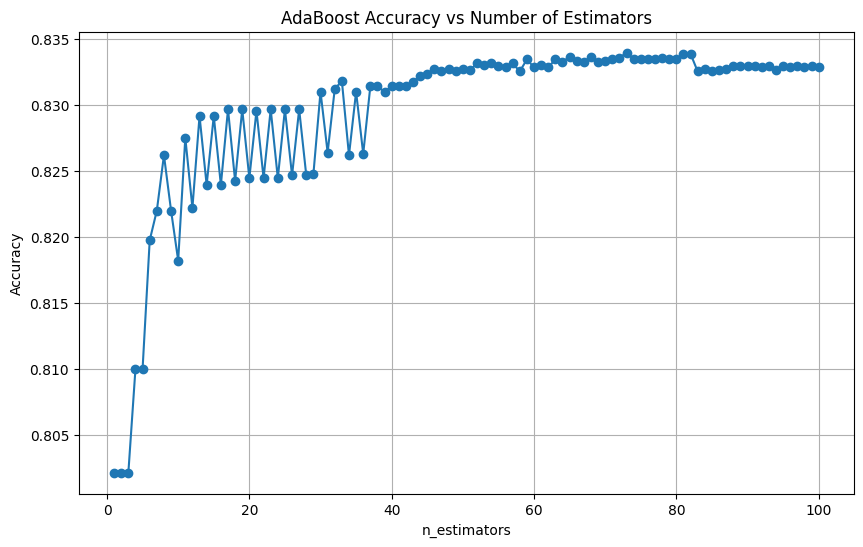

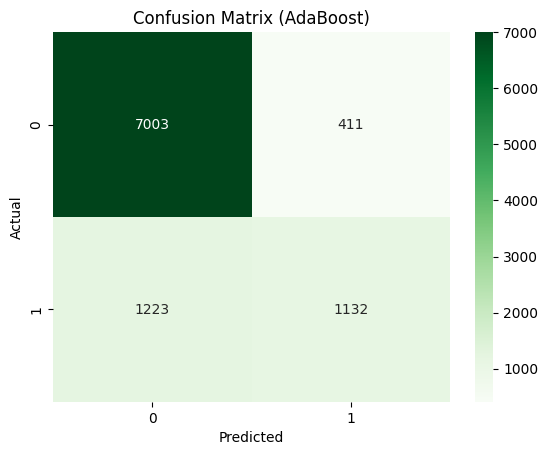

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/income.csv")

# Encode the target column (income_level)
le = LabelEncoder()
df['income_level'] = le.fit_transform(df['income_level'])  # e.g., '<=50K' → 0, '>50K' → 1

# Separate features and target
X = df.drop(columns=['income_level'])
y = df['income_level']

# One-hot encode categorical features (if any) - in this dataset, it looks like all are numeric
# If other categorical columns exist in full dataset, use pd.get_dummies(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: AdaBoost with default n_estimators = 10
adaboost_default = AdaBoostClassifier(n_estimators=10, random_state=42)
adaboost_default.fit(X_train, y_train)
y_pred_default = adaboost_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Default AdaBoost accuracy (n_estimators=10): {accuracy_default:.4f}")

# Step 2: Fine-tune number of estimators
scores = []
n_range = range(1, 101)

for n in n_range:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Best score and corresponding number of estimators
best_n = n_range[scores.index(max(scores))]
best_score = max(scores)
print(f"Best accuracy: {best_score:.4f} with n_estimators = {best_n}")

# Step 3: Plot Accuracy vs n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_range, scores, marker='o')
plt.title('AdaBoost Accuracy vs Number of Estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train best AdaBoost model again
from sklearn.ensemble import AdaBoostClassifier
best_model = AdaBoostClassifier(n_estimators=48, random_state=42)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot it
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (AdaBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

